<a href="https://colab.research.google.com/github/alok0260/Loan-Status-Prediction-Model/blob/main/Loan_Status_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [ ]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('/content/loan_data.csv')

In [ ]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [ ]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [ ]:
# number of rows and columns
loan_dataset.shape

(381, 13)

In [ ]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [ ]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [ ]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

Dependents
0     194
2      47
1      43
3+     24
Name: count, dtype: int64

In [ ]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [ ]:
# dependent values
loan_dataset['Dependents'].value_counts()

Dependents
0    194
2     47
1     43
4     24
Name: count, dtype: int64

In [ ]:
# converting all categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Loan_Status':{'N':0,'Y':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
4,LP001013,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,2,1


In [ ]:
loan_dataset.shape

(308, 13)

Data Visualization

<Axes: xlabel='Education', ylabel='count'>

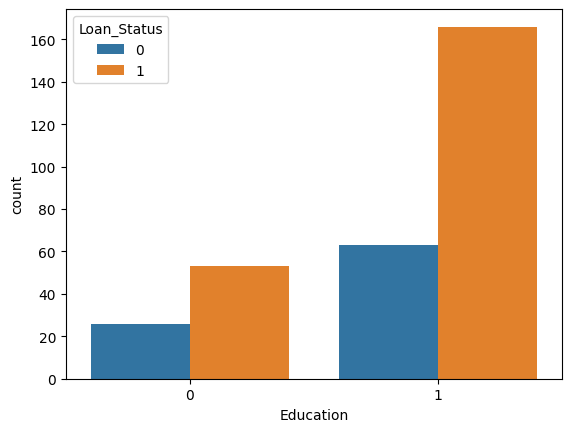

In [ ]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

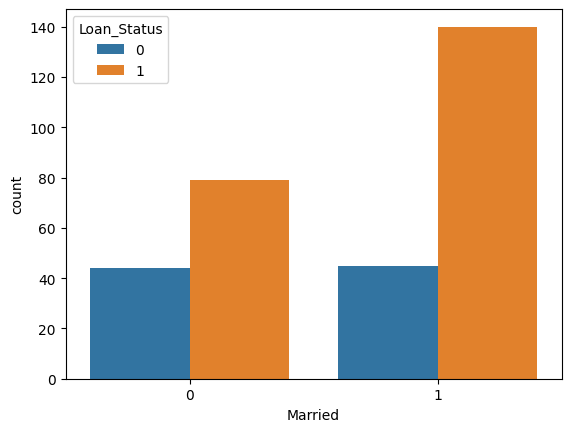

In [ ]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [ ]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [ ]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        1          1          1              0             4583   
1         1        1          0          1              1             3000   
2         1        1          0          0              0             2583   
3         1        0          0          1              0             6000   
4         1        1          0          0              0             2333   
..      ...      ...        ...        ...            ...              ...   
376       1        1          4          1              0             5703   
377       1        1          0          1              0             3232   
378       0        0          0          1              0             2900   
379       1        1          4          1              0             4106   
380       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Train Test Split

In [ ]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(308, 11) (246, 11) (62, 11)


Training the model:

Support Vector Machine Model

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
#training the support Vector Macine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [ ]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [ ]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.8421052631578947


In [ ]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [ ]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8064516129032258


In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
4,LP001013,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,2,1


Making a predictive system

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming you have your training data stored in X_train
scaler = StandardScaler()
scaler.fit(X_train)

std_data = scaler.transform(input_data_reshaped)

input_data = (1, 0,	0, 1,	0, 6000, 0.0,	141.0, 360.0, 1.0, 2)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The Loan is not Approved')
else:
  print('The Loan is Approved')

[[ 0.49872935 -1.18817705 -0.62143724  0.56796183 -0.32115263  1.54653942
  -0.47451075  1.24975157  0.25101232  0.42075348  1.25842591]]
[0]
The Loan is not Approved


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Importing Logistic Regression

In [ ]:
# Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

# initialize the Logistic Regression model
logistic_model = LogisticRegression()

In [ ]:
# training the Logistic Regression model
logistic_model.fit(X_train, Y_train)

# accuracy score on training data
training_data_accuracy_logistic = logistic_model.score(X_train, Y_train)
print('Accuracy on training data (Logistic Regression): ', training_data_accuracy_logistic)

# accuracy score on test data
test_data_accuracy_logistic = logistic_model.score(X_test, Y_test)
print('Accuracy on test data (Logistic Regression): ', test_data_accuracy_logistic)

# making predictions
input_data = np.array([1, 0, 0, 1, 0, 6000, 0.0, 141.0, 360.0, 1.0, 2]).reshape(1, -1)
logistic_prediction = logistic_model.predict(input_data)
print('Logistic Regression prediction:', logistic_prediction)


Accuracy on training data (Logistic Regression):  0.8373983739837398
Accuracy on test data (Logistic Regression):  0.8387096774193549
Logistic Regression prediction: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Assuming you have already trained your SVM classifier and made predictions
# X_train, X_test, Y_train, Y_test are assumed to be your training and testing data
# Make predictions
svm_predictions = classifier.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(Y_test, svm_predictions)
print("Accuracy:", accuracy)
# Calculate precision
precision = precision_score(Y_test, svm_predictions)
print("Precision:", precision)
# Calculate recall
recall = recall_score(Y_test, svm_predictions)
print("Recall:", recall)
# Calculate F1 score
f1 = f1_score(Y_test, svm_predictions)
print("F1 Score:", f1)
# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, svm_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate TN (True Negative)
TN = conf_matrix[0][0]

# Calculate FP (False Positive)
FP = conf_matrix[0][1]

# Calculate specificity
specificity = TN / (TN + FP)

print("Specificity:", specificity)

# Assuming you have already calculated recall and specificity
# Recall is the same as sensitivity, and specificity can be calculated as (TN / (TN + FP))

# Calculate G-mean
def g_mean(recall,specificity):
    return np.sqrt(0.9545454545454546 * 0.4444444444444444)

# Assuming you have already calculated recall and specificity
# Replace recall and specificity with the values you have calculated
gmean = g_mean(0.9545454545454546, 0.4444444444444444)
print("G-mean:", gmean)

Accuracy: 0.8064516129032258
Precision: 0.8076923076923077
Recall: 0.9545454545454546
F1 Score: 0.875
Confusion Matrix:
[[ 8 10]
 [ 2 42]]
Specificity: 0.4444444444444444
G-mean: 0.6513389472789296


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have already trained your logistic regression model and made predictions
# logistic_model is your trained logistic regression model
# X_test and Y_test are your test features and labels respectively

# Make predictions
logistic_predictions = logistic_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, logistic_predictions)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(Y_test, logistic_predictions)
print("Precision:", precision)

# Calculate recall
recall = recall_score(Y_test, logistic_predictions)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(Y_test, logistic_predictions)
print("F1 Score:", f1)

# Confusion matrix
conf_matrix_lr = confusion_matrix(Y_test, logistic_model.predict(X_test))
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_lr)

# Extracting TN, FP, FN, TP from confusion matrix
TN_lr, FP_lr, FN_lr, TP_lr = conf_matrix_lr.ravel()

# Specificity calculation
specificity_lr = TN_lr / (TN_lr + FP_lr)
print("Specificity for Logistic Regression:", specificity_lr)

# G-mean calculation
sensitivity_lr = TP_lr / (TP_lr + FN_lr)
g_mean_lr = (sensitivity_lr * specificity_lr) ** 0.5
print("G-mean for Logistic Regression:", g_mean_lr)


Accuracy: 0.8387096774193549
Precision: 0.8148148148148148
Recall: 1.0
F1 Score: 0.8979591836734693
Confusion Matrix for Logistic Regression:
[[ 8 10]
 [ 0 44]]
Specificity for Logistic Regression: 0.4444444444444444
G-mean for Logistic Regression: 0.6666666666666666
